# Ex: ANOVA - Làm thêm

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_excel("dataset.xlsx",sheet_name="Works")

In [3]:
data

,Less_6hrs,From_6_12_hrs,More_12hrs
0,6.3,7.2,6.3
1,7.0,6.6,5.8
2,6.5,6.1,6.0
3,6.6,5.8,5.5
4,7.2,6.8,5.2
5,6.9,7.1,6.5
6,6.4,5.9,5.3


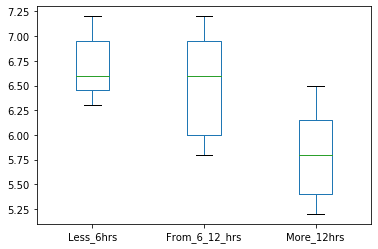

In [4]:
data.boxplot(column=['Less_6hrs', 'From_6_12_hrs', 'More_12hrs'], grid=False)

### Bước 1: Kiểm tra tính đồng nhất của phương sai

In [6]:
import scipy.stats as stats
w, pvalue = stats.levene(data['Less_6hrs'], data['From_6_12_hrs'], data['More_12hrs'])
print(w, pvalue)

1.2112299465240635 0.32098155701877407


- Với p= 0.32 (>>0.05): Chấp nhận Ho: Null hypothesis: các mẫu từ các quần thể có phương sai bằng nhau.
- =>Đủ điều kiện để phân tích tiếp ANOVA

### Bước 2: Phân tích ANOVA test

In [5]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(data['Less_6hrs'], data['From_6_12_hrs'], data['More_12hrs'])
print(fvalue, pvalue)

6.8300970873786415 0.006206265907874949


- Với giá trị p << 0.05 và fvalue >> 3.55 => Bác bỏ Ho => Chấp nhận Ha: Có sự khác biệt đáng kể giữa các nhóm

In [7]:
# Kiểm tra sự khác biệt giữa các nhóm
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['Less_6hrs', 'From_6_12_hrs', 'More_12hrs'])
# replace column names
d_melt.columns = ['index', 'groups', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(groups)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(groups),3.126667,2.0,6.830097,0.006206
Residual,4.120000,18.0,NaN,NaN


In [9]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9415117502212524 0.23340006172657013


- Với p= 0.234 (>>0.05): Chấp nhận Ho: dữ liệu được rút ra từ normal distribution

### Phân tích so sánh cặp - Multiple pairwise comparison (Tukey HSD)

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['groups'], alpha=0.05)
print(m_comp)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1      group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
From_6_12_hrs  Less_6hrs      0.2 0.7067 -0.4524  0.8524  False
From_6_12_hrs More_12hrs     -0.7 0.0344 -1.3524 -0.0476   True
    Less_6hrs More_12hrs     -0.9 0.0066 -1.5524 -0.2476   True
---------------------------------------------------------------


- Các kết quả trên từ Tukey HSD cho thấy rằng ngoại trừ From_6_12_hrs - Less_6hrs, tất cả các so sánh cặp khác đều bác bỏ null hypothesis và chỉ ra sự khác biệt đáng kể về mặt thống kê.